In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Directory list**

In [ ]:
INPUT_DIR_A = "/content/drive/MyDrive/Colab Notebooks/Heartbeat"
INPUT_DIR_A_WAVE = "/content/drive/MyDrive/Colab Notebooks/Heart beat/set_a"
INPUT_DIR_A_CSV = "/content/drive/MyDrive/Colab Notebooks/Heart beat/set_a.csv"
INPUT_DIR_A_TIMING_CSV = "/content/drive/MyDrive/Colab Notebooks/Heart beat/set_a_timing.csv"

# **KNN , Naive Biyas , Support Vector Machine (SVM)**

In [ ]:
# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import plotly.figure_factory as ff
import plotly.express as px

In [ ]:
# 📂 File paths
INPUT_DIR_A = "/content/drive/MyDrive/Colab Notebooks/Heartbeat"
INPUT_DIR_A_WAVE = "/content/drive/MyDrive/Colab Notebooks/Heart beat/set_a"
INPUT_DIR_A_CSV = "/content/drive/MyDrive/Colab Notebooks/Heart beat/set_a.csv"
INPUT_DIR_A_TIMING_CSV = "/content/drive/MyDrive/Colab Notebooks/Heart beat/set_a_timing.csv"

In [ ]:
# ✅ Load dataset
df = pd.read_csv(INPUT_DIR_A_CSV)
print("Dataset Shape:", df.shape)
print("Column names:", df.columns.tolist()) # Add this line to display column names
display(df.head())

Dataset Shape: (176, 4)
Column names: ['dataset', 'fname', 'label', 'sublabel']


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


**NaN value thakay ei code error dise, amr csv file er lebel field a kono valu NaN ache tai**

In [ ]:
# # ✅ Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Ager code block a jei NaN error chilo seta ekhane fixed kora hoise.**

In [ ]:
# 🔎 Check missing values
print("Missing values per column:\n", df.isnull().sum())

# 🛠 Fix: Fill numeric NaNs with column mean
for col in df.columns:
    if df[col].dtype != 'object':   # numeric column
        df[col].fillna(df[col].mean(), inplace=True)
    else:                           # categorical column
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify again
print("After cleaning, missing values:\n", df.isnull().sum())

# Split features/labels again
X = df.drop(columns=['label'])
y = df['label']

# ✅ Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Missing values per column:
 dataset       0
fname         0
label        52
sublabel    176
dtype: int64
After cleaning, missing values:
 dataset       0
fname         0
label         0
sublabel    176
dtype: int64


/tmp/ipython-input-2153085179.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2153085179.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

**Ekhane target coloum bad deya hoise**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Separate X and y
X = df.drop(columns=['label'])
y = df['label']

# Encode target labels if they are strings
le = LabelEncoder()
y = le.fit_transform(y)

# Encode non-numeric features in X
for col in X.columns:
    if X[col].dtype == 'object':   # categorical column
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# ✅ Train-test split (now all numeric)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.impute import SimpleImputer

# Impute missing values (replace NaN with column mean for numeric features)
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['sublabel']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['sublabel']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


**KNN, Naive Bayes, SVM Model gual ekhane define kora hoise**


🔹 Training KNN...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.80      1.00      0.89         4
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.95      0.96      0.95        36
weighted avg       0.98      0.97      0.97        36



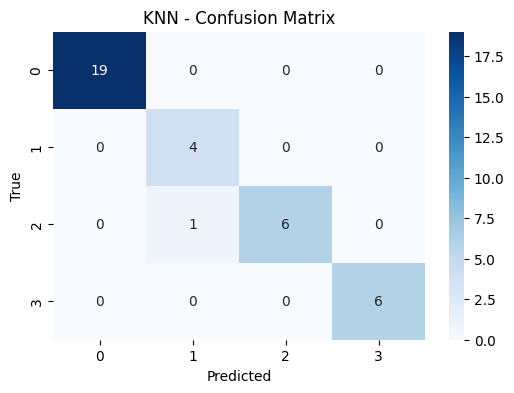


🔹 Training Naive Bayes...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.80      1.00      0.89         4
           2       1.00      0.86      0.92         7
           3       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.95      0.96      0.95        36
weighted avg       0.98      0.97      0.97        36



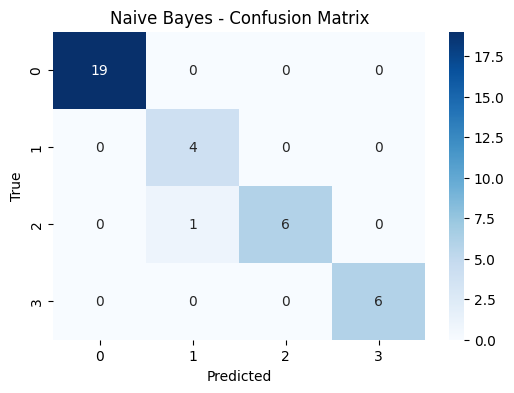


🔹 Training SVM...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.67      1.00      0.80         4
           2       1.00      0.71      0.83         7
           3       1.00      1.00      1.00         6

    accuracy                           0.94        36
   macro avg       0.92      0.93      0.91        36
weighted avg       0.96      0.94      0.95        36



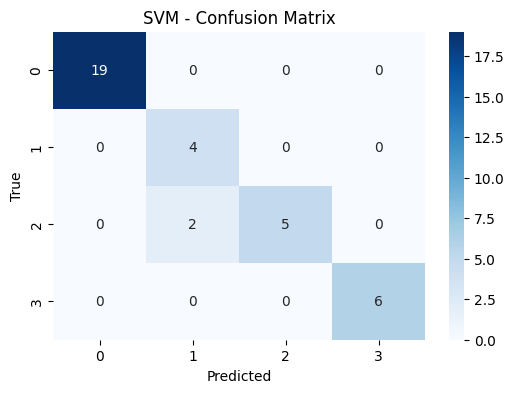

In [ ]:
# ================================
# 🚀 Train Models
# ================================

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Save results
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report

    # Print textual report
    print(classification_report(y_test, y_pred))

    # ✅ Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

**Report Genarate kora hoise**

In [ ]:

# ================================
# 📊 Interactive Visualization
# ================================

# Convert results into DataFrame for Plotly
all_reports = []
for model_name, metrics in results.items():
    for label, scores in metrics.items():
        if isinstance(scores, dict):
            all_reports.append([model_name, label, scores['precision'], scores['recall'], scores['f1-score'], scores['support']])

report_df = pd.DataFrame(all_reports, columns=["Model", "Class", "Precision", "Recall", "F1-Score", "Support"])

# Interactive bar plot
fig = px.bar(
    report_df,
    x="Class", y="F1-Score",
    color="Model",
    barmode="group",
    facet_row="Model",
    text="F1-Score",
    title="📊 F1-Score Comparison Across Models"
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

# Interactive Heatmap for Precision/Recall
heatmap_data = report_df.pivot_table(values="Precision", index="Model", columns="Class")
fig2 = ff.create_annotated_heatmap(
    z=heatmap_data.values,
    x=list(heatmap_data.columns),
    y=list(heatmap_data.index),
    colorscale="Viridis",
    showscale=True
)
fig2.update_layout(title="🔥 Precision Heatmap per Model/Class")
fig2.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

"""**Directory list**"""

INPUT_DIR_A = "/content/drive/MyDrive/Colab Notebooks/Heartbeat"
INPUT_DIR_A_WAVE = "/content/drive/MyDrive/Colab Notebooks/Heart beat/set_a"
INPUT_DIR_A_CSV = "/content/drive/MyDrive/Colab Notebooks/Heart beat/set_a.csv"
INPUT_DIR_A_TIMING_CSV = "/content/drive/MyDrive/Colab Notebooks/Heart beat/set_a_timing.csv"

"""# **KNN , Naive Biyas , Support Vector Machine (SVM)**"""

# 📌 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import plotly.figure_factory as ff
import plotly.express as px

# 📂 File paths
INPUT_DIR_A = "/content/drive/MyDrive/Colab Notebooks/Heartbeat"
INPUT_DIR_A_WAVE = "/content/drive/MyDrive/Colab Notebooks/Heart beat/set_a"
INPUT_DIR_A_CSV = "/content/drive/MyDrive/Colab Notebooks/Heart beat/set_a.csv"
INPUT_DIR_A_TIMING_CSV = "/content/drive/MyDrive/Colab Notebooks/Heart beat/set_a_timing.csv"

# ✅ Load dataset
df = pd.read_csv(INPUT_DIR_A_CSV)
print("Dataset Shape:", df.shape)
print("Column names:", df.columns.tolist()) # Add this line to display column names
display(df.head())

"""**NaN value thakay ei code error dise, amr csv file er lebel field a kono valu NaN ache tai**"""

# # ✅ Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

"""**Ager code block a jei NaN error chilo seta ekhane fixed kora hoise.**"""

# 🔎 Check missing values
print("Missing values per column:\n", df.isnull().sum())

# 🛠 Fix: Fill numeric NaNs with column mean
for col in df.columns:
    if df[col].dtype != 'object':   # numeric column
        df[col].fillna(df[col].mean(), inplace=True)
    else:                           # categorical column
        df[col].fillna(df[col].mode()[0], inplace=True)

# Verify again
print("After cleaning, missing values:\n", df.isnull().sum())

# Split features/labels again
X = df.drop(columns=['label'])
y = df['label']

# ✅ Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

"""**Ekhane target coloum bad deya hoise**"""

from sklearn.preprocessing import LabelEncoder

# Separate X and y
X = df.drop(columns=['label'])
y = df['label']

# Encode target labels if they are strings
le = LabelEncoder()
y = le.fit_transform(y)

# Encode non-numeric features in X
for col in X.columns:
    if X[col].dtype == 'object':   # categorical column
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# ✅ Train-test split (now all numeric)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

from sklearn.impute import SimpleImputer

# Impute missing values (replace NaN with column mean for numeric features)
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

"""**KNN, Naive Bayes, SVM Model gual ekhane define kora hoise**"""

# ================================
# 🚀 Train Models
# ================================

models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Save results
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report

    # Print textual report
    print(classification_report(y_test, y_pred))

    # ✅ Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

"""**Report Genarate kora hoise**"""

# ================================
# 📊 Interactive Visualization
# ================================

# Convert results into DataFrame for Plotly
all_reports = []
for model_name, metrics in results.items():
    for label, scores in metrics.items():
        if isinstance(scores, dict):
            all_reports.append([model_name, label, scores['precision'], scores['recall'], scores['f1-score'], scores['support']])

report_df = pd.DataFrame(all_reports, columns=["Model", "Class", "Precision", "Recall", "F1-Score", "Support"])

# Interactive bar plot
fig = px.bar(
    report_df,
    x="Class", y="F1-Score",
    color="Model",
    barmode="group",
    facet_row="Model",
    text="F1-Score",
    title="📊 F1-Score Comparison Across Models"
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.show()

# Interactive Heatmap for Precision/Recall
heatmap_data = report_df.pivot_table(values="Precision", index="Model", columns="Class")
fig2 = ff.create_annotated_heatmap(
    z=heatmap_data.values,
    x=list(heatmap_data.columns),
    y=list(heatmap_data.index),
    colorscale="Viridis",
    showscale=True
)
fig2.update_layout(title="🔥 Precision Heatmap per Model/Class")
fig2.show()